In [2]:
!pip install nltk
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve,confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

In [4]:
data = pd.read_csv(r"C:\Users\KIIT0001\Downloads\spam (1).csv")
data['target'] = np.where(data['target']=='spam',1, 0) #convert the labels to numerical values, 1 for spam and 0 for non-spam.
data.head(10)

text  target
0  Go until jurong point, crazy.. Available only ...       0
1                      Ok lar... Joking wif u oni...       0
2  Free entry in 2 a wkly comp to win FA Cup fina...       1
3  U dun say so early hor... U c already then say...       0
4  Nah I don't think he goes to usf, he lives aro...       0
5  FreeMsg Hey there darling it's been 3 week's n...       1
6  Even my brother is not like to speak with me. ...       0
7  As per your request 'Melle Melle (Oru Minnamin...       0
8  WINNER!! As a valued network customer you have...       1
9  Had your mobile 11 months or more? U R entitle...       1

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], 
                                                    data['target'], 
                                                    random_state=0)

In [6]:
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized.toarray().shape

(4179, 40704)

In [7]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, Y_train)

MultinomialNB(alpha=0.1)

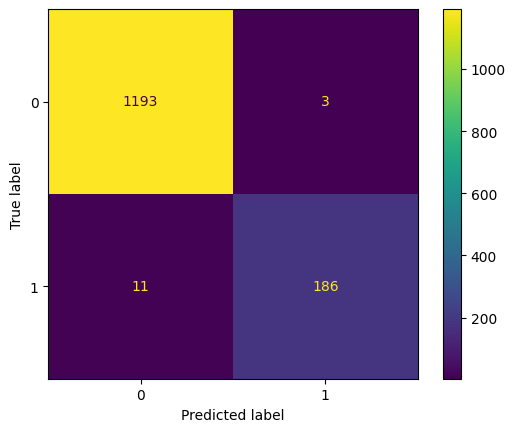

In [8]:
predictions = model.predict(vectorizer.transform(X_test))
cm=confusion_matrix(Y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()


In [9]:
print("Accuracy:", 100 * sum(predictions == Y_test) / len(predictions), '%')
print("precision:", precision_score(Y_test, predictions, average='micro'))
print("recall:", recall_score(Y_test, predictions, average='micro'))
print("f1_score:", f1_score(Y_test, predictions, average='micro'))

Accuracy: 98.99497487437186 %
precision: 0.9899497487437185
recall: 0.9899497487437185
f1_score: 0.9899497487437185


In [12]:
!pip install torch

^C


  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB 640.0 kB/s eta 0:04:10
   ---------------------------------------- 0.0/159.8 MB 640.0 kB/s eta 0:04:10
   ---------------------------------------- 0.0/159.8 MB 640.0 kB/s eta 0:04:10
   ---------------------------------------- 0.0/159.8 MB 640.0 kB/s eta 0:04:10
   ---------------------------------------- 0.1/159.8 MB 435.7 kB/s eta 0:06:07
   ---------------------------------------- 0.1/159.8 MB 423.5 kB/s eta 0:06:18
   ---------------------------------------- 0.1/159.8 MB 425.3 kB/s eta 0:06:16
   ---------------------------------------- 0.2/159.8 MB 490.7 kB/s eta 0:05:26
   ---------------------------------------- 0.2/159.8 MB 471.4 kB/s eta 0:05:39
   ---------------------------------------- 0.2/159.8 MB 471.4 kB/s eta 0:05:39
   ---------------------------------------- 0.2/159.8 MB 485.6 

In [13]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [14]:
# Create a torch.Tensor object with the given data.  It is a 1D vector
V_data = [1., 2., 3.]
V = torch.Tensor(V_data)
print(V)

# Creates a matrix
M_data = [[1., 2., 3.], [4., 5., 6]]
M = torch.Tensor(M_data)
print(M)

# Create a 3D tensor of size 2x2x2.
T_data = [[[1.,2.], [3.,4.]],
          [[5.,6.], [7.,8.]]]
T = torch.Tensor(T_data)
print(T)

tensor([1., 2., 3.])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


In [15]:
# Index into V and get a scalar
print(V[0])

# Index into M and get a vector
print(M[0])

# Index into T and get a matrix
print(T[0])

tensor(1.)
tensor([1., 2., 3.])
tensor([[1., 2.],
        [3., 4.]])


In [16]:
x = torch.randn((3, 4, 5))
print(x)

tensor([[[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002],
         [-0.6092, -0.9798, -1.6091, -0.7121,  0.3037],
         [-0.7773, -0.2515, -0.2223,  1.6871,  0.2284],
         [ 0.4676, -0.6970, -1.1608,  0.6995,  0.1991]],

        [[ 0.8657,  0.2444, -0.6629,  0.8073,  1.1017],
         [-0.1759, -2.2456, -1.4465,  0.0612, -0.6177],
         [-0.7981, -0.1316,  1.8793, -0.0721,  0.1578],
         [-0.7735,  0.1991,  0.0457,  0.1530, -0.4757]],

        [[-0.1110,  0.2927, -0.1578, -0.0288,  0.4533],
         [ 1.1422,  0.2486, -1.7754, -0.0255, -1.0233],
         [-0.5962, -1.0055,  0.4285,  1.4761, -1.7869],
         [ 1.6103, -0.7040, -0.1853, -0.9962, -0.8313]]])


In [17]:
x = torch.Tensor([ 1., 2., 3. ])
y = torch.Tensor([ 4., 5., 6. ])
z = x + y
print(z)

tensor([5., 7., 9.])


In [18]:
# By default, it concatenates along the first axis (concatenates rows)
x_1 = torch.randn(2, 5)
y_1 = torch.randn(3, 5)
z_1 =torch.cat([x_1, y_1])
print(z_1)

# Concatenate columns:
x_2 = torch.randn(2, 3)
y_2 = torch.randn(2, 5)
z_2 = torch.cat([x_2, y_2], 1) # second arg specifies which axis to concat along
print(z_2)

# If your tensors are not compatible, torch will complain.
torch.cat([x_1, x_2])

tensor([[-0.8029,  0.2366,  0.2857,  0.6898, -0.6331],
        [ 0.8795, -0.6842,  0.4533,  0.2912, -0.8317],
        [-0.5525,  0.6355, -0.3968, -0.6571, -1.6428],
        [ 0.9803, -0.0421, -0.8206,  0.3133, -1.1352],
        [ 0.3773, -0.2824, -2.5667, -1.4303,  0.5009]])
tensor([[ 0.5438, -0.4057,  1.1341, -0.1473,  0.6272,  1.0935,  0.0939,  1.2381],
        [-1.1115,  0.3501, -0.7703, -1.3459,  0.5119, -0.6933, -0.1668, -0.9999]])


RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 5 but got size 3 for tensor number 1 in the list.

In [19]:
x = torch.randn(2, 3, 4)
print(x)
print(x.view(2, 12)) # Reshape to 2 rows, 12 columns
print (x.view(2, -1,-1)) # Same as above.  If one of the dimensions is -1, its size can be inferred

tensor([[[ 0.4175, -0.2127, -0.8400, -0.4200],
         [-0.6240, -0.9773,  0.8748,  0.9873],
         [-0.0594, -2.4919,  0.2423,  0.2883]],

        [[-0.1095,  0.3126,  1.5038,  0.5038],
         [ 0.6223, -0.4481, -0.2856,  0.3880],
         [-1.1435, -0.6512, -0.1032,  0.6937]]])
tensor([[ 0.4175, -0.2127, -0.8400, -0.4200, -0.6240, -0.9773,  0.8748,  0.9873,
         -0.0594, -2.4919,  0.2423,  0.2883],
        [-0.1095,  0.3126,  1.5038,  0.5038,  0.6223, -0.4481, -0.2856,  0.3880,
         -1.1435, -0.6512, -0.1032,  0.6937]])


RuntimeError: only one dimension can be inferred

In [20]:
# Variables wrap tensor objects
x = autograd.Variable( torch.Tensor([1., 2., 3]), requires_grad=True )
# You can access the data with the .data attribute
print(x.data)

# You can also do all the same operations you did with tensors with Variables.
y = autograd.Variable( torch.Tensor([4., 5., 6]), requires_grad=True )
z = x + y
print(z.data)

# BUT z knows something extra.
print(z.grad_fn)

tensor([1., 2., 3.])
tensor([5., 7., 9.])


In [21]:
# Lets sum up all the entries in z
s = z.sum()
print(s)
print(s.grad_fn)

tensor(21., grad_fn=<SumBackward0>)


In [22]:
s.backward() # calling .backward() on any variable will run backprop, starting from it.
print(x.grad)

tensor([1., 1., 1.])


In [23]:
x = torch.randn((2,2))
y = torch.randn((2,2))
z = x + y # These are Tensor types, and backprop would not be possible

var_x = autograd.Variable( x , requires_grad=True ) # requires_grad=True is mandatory for grad computation
var_y = autograd.Variable( y , requires_grad=True )
var_z = var_x + var_y # var_z contains enough information to compute gradients, as we saw above
print(var_z.grad_fn)

var_z_data = var_z.data # Get the wrapped Tensor object out of var_z...
new_var_z = autograd.Variable( var_z_data ) # Re-wrap the tensor in a new variable

# ... does new_var_z have information to backprop to x and y?
# NO!
print(new_var_z.grad_fn)
# And how could it?  We yanked the tensor out of var_z (that is what var_z.data is).  This tensor
# doesn't know anything about how it was computed.  We pass it into new_var_z, and this is all the information
# new_var_z gets.  If var_z_data doesn't know how it was computed, theres no way new_var_z will.
# In essence, we have broken the variable away from its past history

None


In [24]:
lin = nn.Linear(5, 3) # maps from R^5 to R^3, parameters A, b
data = autograd.Variable( torch.randn(2, 5), requires_grad=True  ) # data is 2x5.  A maps from 5 to 3... can we map "data" under A?
print(lin(data)) # yes

tensor([[-0.6831,  0.3639, -0.7709],
        [ 0.6161,  1.2096, -0.3063]], grad_fn=<AddmmBackward0>)


In [25]:
data = autograd.Variable( torch.randn(2, 2), requires_grad=True  )
print(data)
print(F.relu(data))

tensor([[-0.1024, -0.8491],
        [ 0.1112,  0.1618]], requires_grad=True)
tensor([[0.0000, 0.0000],
        [0.1112, 0.1618]], grad_fn=<ReluBackward0>)


In [26]:
# Softmax is also in torch.functional
data = autograd.Variable( torch.randn(5), requires_grad=True )
print(data)
print(F.softmax(data,dim=0))
print(F.softmax(data,dim=0).sum()) # Sums to 1 because it is a distribution!
print(F.log_softmax(data,dim=0)) # theres also log_softmax

tensor([-1.4105, -0.3404, -3.0121,  0.5710,  1.4330], requires_grad=True)
tensor([0.0350, 0.1021, 0.0071, 0.2541, 0.6017], grad_fn=<SoftmaxBackward0>)
tensor(1., grad_fn=<SumBackward0>)
tensor([-3.3515, -2.2815, -4.9531, -1.3700, -0.5080],
       grad_fn=<LogSoftmaxBackward0>)
